<b><font size=5><center>Исследование поведения пользователей мобильного приложения.<br>Сборный проект-2</center></font></b>

### Суть проекта

Вы работаете в стартапе, который продаёт продукты питания. Нужно разобраться, как ведут себя пользователи вашего мобильного приложения.
Изучите воронку продаж. Узнайте, как пользователи доходят до покупки. Сколько пользователей доходит до покупки, а сколько — «застревает» на предыдущих шагах? На каких именно?
После этого исследуйте результаты A/A/B-эксперимента. Дизайнеры захотели поменять шрифты во всём приложении, а менеджеры испугались, что пользователям будет непривычно. Договорились принять решение по результатам A/A/B-теста. Пользователей разбили на 3 группы: 2 контрольные со старыми шрифтами и одну экспериментальную — с новыми. Выясните, какой шрифт лучше.
Создание двух групп A вместо одной имеет определённые преимущества. Если две контрольные группы окажутся равны, вы можете быть уверены в точности проведенного тестирования. Если же между значениями A и A будут существенные различия, это поможет обнаружить факторы, которые привели к искажению результатов. Сравнение контрольных групп также помогает понять, сколько времени и данных потребуется для дальнейших тестов.
В случае общей аналитики и A/A/B-эксперимента работайте с одними и теми же данными. В реальных проектах всегда идут эксперименты. Аналитики исследуют качество работы приложения по общим данным, не учитывая принадлежность пользователей к экспериментам.

### Описание проекта

В ходе данного проекта мы получили и подготовили данные, изучили и проверили их на аномалии. Далее мы построили и изучили воронку событий и изучили результаты эксперимента с помощью проверки гипотез о равенстве долей.

### Получение данных

In [1]:
import pandas as pd                     # импорт библиотек
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import datetime as dt
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"C:\Users\mi\Downloads\logs_exp.csv", sep='\t')    # извлечение данных

data.head(10)    

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
5,CartScreenAppear,6217807653094995999,1564055323,248
6,OffersScreenAppear,8351860793733343758,1564066242,246
7,MainScreenAppear,5682100281902512875,1564085677,246
8,MainScreenAppear,1850981295691852772,1564086702,247
9,MainScreenAppear,5407636962369102641,1564112112,246


### Подготовка данных

In [3]:
data.columns = ['event_name', 'user_id', 'event_timestamp', 'group']   # переименование столбцов
data.head()

,event_name,user_id,event_timestamp,group
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [4]:
data.info()   # проверка на тип данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   event_name       244126 non-null  object
 1   user_id          244126 non-null  int64 
 2   event_timestamp  244126 non-null  int64 
 3   group            244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [5]:
data['event_timestamp'] = pd.to_datetime(data['event_timestamp'], unit='s') # преобразование типа данныз в столбце со временем 
data.head()

,event_name,user_id,event_timestamp,group
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248


In [6]:
data.isna().sum() # проверка на пропуски

event_name         0
user_id            0
event_timestamp    0
group              0
dtype: int64

In [7]:
data.duplicated().sum()   # проверка на дубликаты

413

In [8]:
data.drop_duplicates(inplace=True)  # удаление дубликатов
data.duplicated().sum()

0

In [9]:
data['date'] = data['event_timestamp'].dt.date  # добавление отдельного столбца с датой
data.head() 

,event_name,user_id,event_timestamp,group,date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25


#### Вывод

В нашем распоряжении датафрейм с информацией о действиях пользователей в мобильном приложении. Каждая строка в нем - это действие пользователя или событие. Столбцы: event_name - название события, user_id - уникальный идентификатор пользователя, event_timestamp - дата и время события, group - номер экспериментальной группы, date - дата события.
Пропусков в данных нет. Дубликаты в количестве 413 штук удалены.

### Изучение и проверка данных

In [10]:
print('Событий в логе:', len(data))
print('Пользователей в логе:', len(data['user_id'].unique()))
print('В среднем событий приходится на пользователя:', len(data) / len(data['user_id'].unique()))

Событий в логе: 243713
Пользователей в логе: 7551
В среднем событий приходится на пользователя: 32.27559263673685


In [11]:
print(data['event_timestamp'].min())  # даты начала и окончания теста
print(data['event_timestamp'].max()) 

2019-07-25 04:43:36
2019-08-07 21:15:17


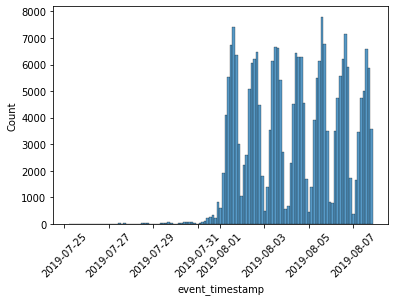

In [12]:
sns.histplot(data['event_timestamp'])
plt.xticks(rotation=45)
plt.show()

На гистограмме видно, что почти все действия приходятся на период с 01.08.2019 по 07.08.2019. Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные». Поэтому будем считать, что до 01.08.2019 у нас в датафрейме данные старые. Оставим для анализа только полные данные периода с 01.08.2019 по 07.08.2019

In [13]:
moment = dt.date(2019, 8, 1)
actual_data = data.query('date >= @moment')
actual_data.head()

,event_name,user_id,event_timestamp,group,date
2828,Tutorial,3737462046622621720,2019-08-01 00:07:28,246,2019-08-01
2829,MainScreenAppear,3737462046622621720,2019-08-01 00:08:00,246,2019-08-01
2830,MainScreenAppear,3737462046622621720,2019-08-01 00:08:55,246,2019-08-01
2831,OffersScreenAppear,3737462046622621720,2019-08-01 00:08:58,246,2019-08-01
2832,MainScreenAppear,1433840883824088890,2019-08-01 00:08:59,247,2019-08-01


In [14]:
actual_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240887 entries, 2828 to 244125
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   event_name       240887 non-null  object        
 1   user_id          240887 non-null  int64         
 2   event_timestamp  240887 non-null  datetime64[ns]
 3   group            240887 non-null  int64         
 4   date             240887 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 11.0+ MB


In [15]:
print('Количество потерянных логов:', len(data) - len(actual_data))
print('Процент потерянных логов:', (len(data) - len(actual_data)) / len(data) * 100)

Количество потерянных логов: 2826
Процент потерянных логов: 1.159560630741897


При очистке данных от старых мы потеряли 2826 логов. Это всего лишь 1,16 процента.

In [16]:
actual_data['group'].unique()

array([246, 247, 248], dtype=int64)

#### Вывод

При анализе гистограммы дат мы выяснили, что данные до 1 августа - не полные, и откинули их. В новых данных остались пользователи из всех трех экспериментальных групп.

### Изучение воронки событий

In [17]:
actual_data['event_name'].value_counts()  # проверка событий и их частоты появления в логах

MainScreenAppear           117328
OffersScreenAppear          46333
CartScreenAppear            42303
PaymentScreenSuccessful     33918
Tutorial                     1005
Name: event_name, dtype: int64

Самое частое событие - демонстрация главного экрана, самое редкое - обучение

Посчитаем, сколько уникальных пользователей совершали каждое из событий 

In [18]:
funnel = actual_data.groupby('event_name').agg({'user_id': 'nunique'}).sort_values(by='user_id', ascending=False).reset_index()
funnel

,event_name,user_id
0,MainScreenAppear,7419
1,OffersScreenAppear,4593
2,CartScreenAppear,3734
3,PaymentScreenSuccessful,3539
4,Tutorial,840


In [19]:
for i in range(len(funnel)):
    funnel.loc[i, 'conv'] = round(funnel.iloc[i, 1] / funnel.iloc[0, 1] * 100, 1)
funnel

,event_name,user_id,conv
0,MainScreenAppear,7419,100.0
1,OffersScreenAppear,4593,61.9
2,CartScreenAppear,3734,50.3
3,PaymentScreenSuccessful,3539,47.7
4,Tutorial,840,11.3


Предположим, что события выстраиваются в таком порядке: обучение, демонстрация главного экрана, корзины, экрана оплаты, заказов. Из данной цепочки можно логически выделить действие обучения. Оно редковыполняемое и не влияет на совершение покупки. Обучение чаще всего просто пропускают. Уберем его из воронки.

In [20]:
clear_funnel = funnel.query('event_name == ["MainScreenAppear", "OffersScreenAppear", "CartScreenAppear", "PaymentScreenSuccessful"]').reset_index().drop(columns='index')
clear_funnel

,event_name,user_id,conv
0,MainScreenAppear,7419,100.0
1,OffersScreenAppear,4593,61.9
2,CartScreenAppear,3734,50.3
3,PaymentScreenSuccessful,3539,47.7


Посчитаем конверсию каждого шага 

In [21]:
for i in range(len(clear_funnel)):
    if i >= 1:
        clear_funnel.loc[i, 'step_conv'] = round(clear_funnel.iloc[i, 1] / clear_funnel.iloc[i-1, 1] * 100, 1)
    elif i == 0:
        clear_funnel.loc[i, 'step_conv'] = 100.0
clear_funnel

,event_name,user_id,conv,step_conv
0,MainScreenAppear,7419,100.0,100.0
1,OffersScreenAppear,4593,61.9,61.9
2,CartScreenAppear,3734,50.3,81.3
3,PaymentScreenSuccessful,3539,47.7,94.8


#### Вывод

Мы откинули событие "Tutorial", т.к. большиство людей пропускает обучение и этот шаг не является обязательным для совершения покупки. При анализе воронки событий, выяснилось, что больше всего покупателей теряется на шаге перехода к заказам. До оплаты доходит только 47,7%.

### Изучение результатов эксперимента

Проверим, есть ли пользователи, попавшие сразу в несколько групп

In [22]:
duplicated_users = actual_data.groupby('user_id').agg({'group': ['nunique', 'unique']})
duplicated_users.columns = ['groups', 'group_names']
duplicated_users = duplicated_users.query('groups > 1')
display(duplicated_users.head())


,groups,group_names
user_id,,


Таких пользователей не оказалось - все в порядке.

Узнаем, сколько уникальных пользователей в каждой группе. Сравним конверсии по шагам воронки в двух контрольных группах

In [23]:
def check_hypothesis(successes1, successes2, trials1, trials2):   # функция для проверки статистической значимости различий в конверсиях
    p1 = successes1/trials1
    p2 = successes2/trials2
    p_combined = (successes1 + successes2) / (trials1 + trials2)
    difference = p1 - p2
    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))
    distr = stats.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    return p_value

trials = actual_data.groupby('group').agg({'user_id': 'nunique'})
display(trials)
funnel_by_groups = actual_data.pivot_table(index='event_name', columns = 'group', values = 'user_id', aggfunc='nunique').sort_values(by=246, ascending=False) # отсортируем по убыванию количества в одной из групп, потому что распределение в группах по событиям идет примерно одинаковое
display(funnel_by_groups)

,user_id
group,
246,2484
247,2513
248,2537


group,246,247,248
event_name,,,
MainScreenAppear,2450,2476,2493
OffersScreenAppear,1542,1520,1531
CartScreenAppear,1266,1238,1230
PaymentScreenSuccessful,1200,1158,1181
Tutorial,278,283,279


Посчитаем статистическую значимость методом проверки гипотезы о равенстве долей (z-test). Критический уровнь значимости обозначим на уровне 0.05. Сформулируем гипотезы:
    нулевая гипотеза - различий между выборками на данном шаге нет, альтернативная - различия есть

In [24]:
for event in data['event_name'].unique():
    funnel_by_groups.loc[event, 'p_value_246/247'] = check_hypothesis(funnel_by_groups.loc[event, 246], funnel_by_groups.loc[event, 247],
                                       trials.loc[246].values[0], trials.loc[247].values[0])
    funnel_by_groups.loc[event, 'p_value_247/248'] =  check_hypothesis(funnel_by_groups.loc[event, 247], funnel_by_groups.loc[event, 248],
                                       trials.loc[247].values[0], trials.loc[248].values[0])
    funnel_by_groups.loc[event, 'p_value_246/248'] =  check_hypothesis(funnel_by_groups.loc[event, 246], funnel_by_groups.loc[event, 248],
                                       trials.loc[246].values[0], trials.loc[248].values[0])
funnel_by_groups   

group,246,247,248,p_value_246/247,p_value_247/248,p_value_246/248
event_name,,,,,,
MainScreenAppear,2450,2476,2493,0.757060,0.458705,0.294972
OffersScreenAppear,1542,1520,1531,0.248095,0.919782,0.208362
CartScreenAppear,1266,1238,1230,0.228834,0.578620,0.078429
PaymentScreenSuccessful,1200,1158,1181,0.114567,0.737342,0.212255
Tutorial,278,283,279,0.937700,0.765324,0.826429


Как видно, все значения p_value в датафрейме существенно превышают критический уровень значимости - значит различий между выборками нет и все механизмы и расчеты корректны. Можно сказать, что разбиение на группы работает корректно.

Объединим контрольные группы  в одну и сравним ее результаты с экспериментальной. Критический уровень значимости оставим прежний - 0,05. Повторно сформулируем гипотезы: нулевая гипотеза - различий между выборками на данном шаге нет, альтернативная - различия есть

In [25]:
funnel_comb = actual_data.pivot_table(index='event_name', columns = 'group', values = 'user_id', aggfunc='nunique').sort_values(by=246, ascending=False) # отсортируем по убыванию количества в одной из групп, потому что распределение в группах по событиям идет примерно одинаковое
funnel_comb['246_and_247'] = funnel_comb[246] + funnel_comb[247]

for event in data['event_name'].unique():
    funnel_comb.loc[event, 'p_value'] = check_hypothesis(funnel_comb.loc[event, 248], funnel_comb.loc[event, '246_and_247'],
                                       trials.loc[248].values[0], (trials.loc[246].values[0] + trials.loc[247].values[0]))

funnel_comb

group,246,247,248,246_and_247,p_value
event_name,,,,,
MainScreenAppear,2450,2476,2493,4926,0.294245
OffersScreenAppear,1542,1520,1531,3062,0.434255
CartScreenAppear,1266,1238,1230,2504,0.181759
PaymentScreenSuccessful,1200,1158,1181,2358,0.600429
Tutorial,278,283,279,561,0.764862


Нулевая гипотеза снова не опровергнута - статистических различий в выборках нет

### Вывод

В ходе данного проекта мы получили и подготовили данные, изучили и проверили их на аномалии. Далее мы построили и изучили воронку событий и изучили результаты эксперимента с помощью проверки гипотез о равенстве долей.
В ходе проверки дат и анализа гистограммы дат мы выяснили, что данные до 1 августа - не полные, и откинули их. В новых данных остались пользователи из всех трех экспериментальных групп.
При анализе воронки отбросили событие "Tutorial", т.к. большиство людей пропускает обучение и этот шаг не является обязательным для совершения покупки. А также выяснили, что больше всего покупателей теряется на шаге перехода к заказам. До оплаты доходит только 47,7%.
При изучении результатов эксперимента различий между выборками не выявлено. Это значит, что все механизмы и расчеты корректны, разбиение на группы работает правильно. Мы брали критический уровень значимости 0.05. Даже если бы взяли меньше, например 0.1, то гипотезы была бы опровергнута только в одном из 20 сравнений. 